<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methods</a></span><ul class="toc-item"><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#One-Class-SVM" data-toc-modified-id="One-Class-SVM-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One Class SVM</a></span></li><li><span><a href="#Isolation-Forest" data-toc-modified-id="Isolation-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Isolation Forest</a></span></li><li><span><a href="#AutoEncoders" data-toc-modified-id="AutoEncoders-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>AutoEncoders</a></span></li><li><span><a href="#GANomaly" data-toc-modified-id="GANomaly-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>GANomaly</a></span></li></ul></li></ul></div>

# Anomaly Detection

## Introduction

**Anomaly detection** is an important problem in machine
learning and has a wide range of applications such as fraud
detection, intrusion detection, event detection and health care (spotting a malignant tumor in an MRI scan). 
In most anomaly detection problems, a lot of normal data is given, and the task is to detect
anomalies that deviates from the normal data. 
**Anomaly detection** algorithms model the data distribution and then report samples atypical in the distribution as anomalies.

There are various **ML** algorithms which are used for **Anomaly Detection**, in the notebook below we will explore some of those **ML** algorithms. Its hard to find datasets for **Anomaly Detection** hence we will mixture of Fraud, synthetic and vision data.


Some of the ML algorithms we will explore are:
1. Density-Based Anomaly Detection method like, **DBSCAN**.
2. Support Vector Machine-Based Anomaly Detection, **One Class SVM**.
3. Decision tree-Based Anomaly Detection, **Isolation Forest**.
4. Deep Neural Network-Based Anomaly Detection, **Autoencoders**.
5. GANs-Bases Anomaly Detection, **GANomaly**.

Some of the techniques like **DBSCAN** and **One Class SVM** are traditional **ML** techniques and others like **GANomaly** are cutting edge model deep learning techniques. Also there are many other methods which have been successfully applied to **Anomaly Detection** above list is a representative yet wide selection of methods in literature.

## Methods
### DBSCAN

**Density-based spatial clustering of applications with noise (DBSCAN)** is a very popular clustering algorithm proposed by Martin Ester et.al. 
https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf

It is a density-based clustering algorithm: given a set of points, it groups together points that are closely packed together, marking as anomalous the points that lie alone in low-density regions. One advantage of **DBSCAN** over **KMeans** is it can identify non circular clusters too. Below we show an example of using **DBSCAN** to identify anomalies/outliers in synthetic data. One of the limitation of **DBSCN** is it struggles from **Curse of dimensionality**, as the data becomes more higher dimensional **DBSCAN** underperfoms. 

Below we create synthetic data to show application of **DBSCAN**.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

%matplotlib inline

First we create synthetic data to show application of **DBSCAN**
Data set is sampled from three **Gaussian** distributions centered at, (0,0), (1,1) and (0,1)
And there are two outliers at (2,0) and (0,3). 

In [2]:
n_points_per_cluster = 100

#Cluster 1 at -> (0,0)
C1 = [0, 0] + .1 * np.random.randn(n_points_per_cluster, 2)
y1 = np.ones(shape=n_points_per_cluster)

#Cluster 2 at -> (1,1)
C2 = [1, 1] + .1 * np.random.randn(n_points_per_cluster, 2)
y2 = np.ones(shape=n_points_per_cluster) + 1

#Cluster 3 at -> (0,1)
C3 = [0, 1] + .1 * np.random.randn(n_points_per_cluster, 2)
y3 = np.ones(shape=n_points_per_cluster) + 2

#Anomalies
C4 = np.array([[2,0],[0,3]])
y4 = [4,4]

X = np.vstack((C1, C2, C3, C4))
y = np.hstack((y1,y2,y3,y4))
y= y.astype('int')

<AxesSubplot:title={'center':'Cluster plot'}>

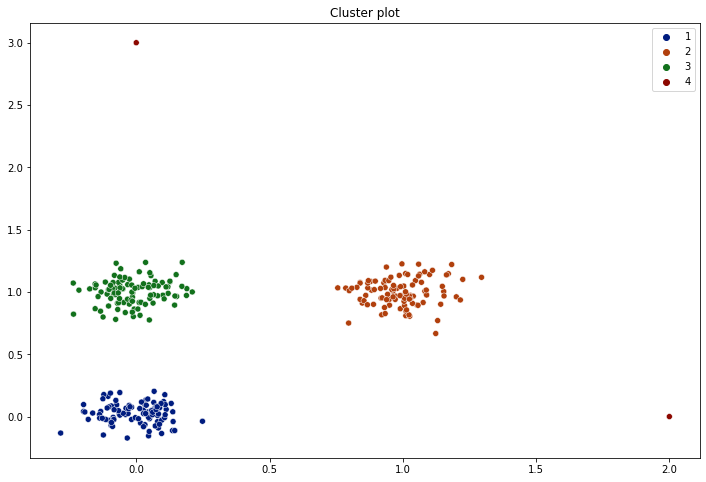

In [3]:
plt.figure(figsize=(12,8))
plt.title('Cluster plot')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='dark')

From the above plots we can see there are three clusters 1,2, and 3 and then there are two outliers at (0,2) and (3,0). Now we will apply **DBSCAN** to identify these clusters and outliers.

In [4]:
#We initialize DBScan with epsilon of 0.2 and min_samples of 10
dbscan = DBSCAN(eps=0.2, min_samples=10)

In [5]:
y_dbscan = dbscan.fit_predict(X)

<AxesSubplot:>

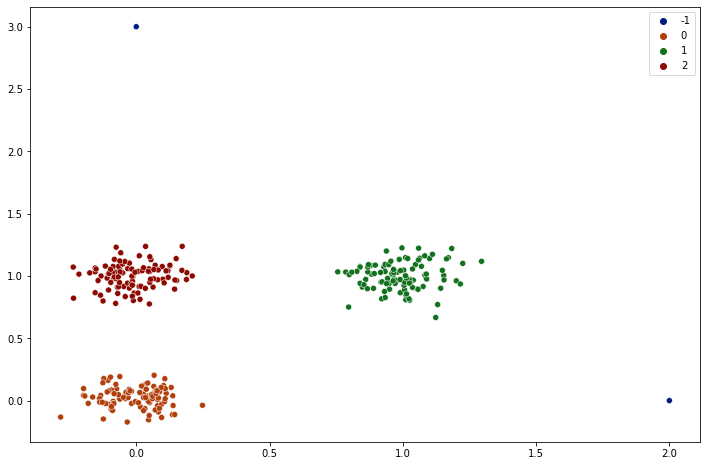

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_dbscan, palette='dark')

We can see from the plot above **DBSCAN** correctly identified the three clusters 0,1, and 2. 
And also identified the two outliers with -1.

This is a toy example but should illustrate the application of **DBSCAN**. Other popular variation of **DBSCAN** is **OPTICS** algorithm that algorithm can also identify clusters of very different densities.

### One Class SVM

Second ML method we want to discuss is **OneClassSVM**. **OneClassSVM** is an unsupervised learning algorithm that is trained only on the "normal" data. It learns the boundaries of normal data and classifies anything which is not inside the boundary as anomalous.


Method was originally proposed in this paper, http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.675.575&rep=rep1&type=pdf. Its still a fairly popular method for Anomaly detection especially when datasets are not that large.


Below we will demonstrate the use of **One Class SVM** on credit card fraud dataset from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud.

There are 492 cases of fraud out of 284,807 transactions.

In [7]:
#Lets load the data
data = pd.read_csv('../data/creditcard.csv')

In [8]:
#Lets look at the head of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Data has 31 columns, we will drop the Time columns and Class column has tag fraud or not.

In [10]:
data.drop(['Time'],inplace=True, axis=1)

In [11]:
#Lets look a the distribution of normal and anomalous data
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Lets use the data to create a train, dev, and test dataset split.
For train we will take 80% of the normal data.
For dev we will take 10% of the normal data and 50% of anomalous data.
For test we will take 10% of the normal data and 50% of anomalous data.

In [12]:
data_normal = data[data['Class']==0]
data_anomalous = data[data['Class']==1]

In [13]:
X_normal = data_normal.drop(['Class'], axis=1).values
#Lets downsample the X_normal data so that we can compute quickly
number_of_rows=20000
ran_rows = np.random.choice(X_normal.shape[0], size=number_of_rows, replace=False, )
X_normal = X_normal[ran_rows,:]
X_anomalous = data_anomalous.drop(['Class'], axis=1).values

In [14]:
from sklearn.model_selection import train_test_split
X_nm_train, X_nm_test_dev = train_test_split(X_normal, train_size=0.8)
X_nm_test, X_nm_dev = train_test_split(X_nm_test_dev, train_size=0.5)
X_a_test, X_a_dev = train_test_split(X_anomalous, train_size=0.5)
#Train set only has normal samples
X_train = X_nm_train
#Dev set has 10% of Normal samples and 50% of anomalous samples
X_dev = np.vstack([X_nm_dev, X_a_dev])
y_dev = np.vstack([np.full(shape=(X_nm_dev.shape[0],1), dtype='int',fill_value=1), 
                   np.full(shape=(X_a_dev.shape[0],1), dtype='int',fill_value=-1)])
#Test set has 10% of Normal samples and 50% of anomalous samples
X_test = np.vstack([X_nm_test, X_a_test])
y_test = np.vstack([np.full(shape=(X_nm_test.shape[0],1),dtype='int',fill_value=1),
                    np.full(shape=(X_a_test.shape[0],1), dtype='int',fill_value=-1)])

In [15]:
print(f"Train set shape={X_train.shape}")
print(f"Dev set shape={X_dev.shape}")
print(f"Test set shape={X_test.shape}")
print(f"Anomalies in Dev Set={np.sum(y_dev==-1)}")
print(f"Anomalies in Test Set={np.sum(y_test==-1)}")

Train set shape=(16000, 29)
Dev set shape=(2246, 29)
Test set shape=(2246, 29)
Anomalies in Dev Set=246
Anomalies in Test Set=246


In [16]:
#Now lets normalize X data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_dev_std = sc.transform(X_dev)
X_test_std = sc.transform(X_test)

In [17]:
#Lets train oneclass SVM with default parameters
from sklearn.svm import OneClassSVM
clf = OneClassSVM().fit(X_train_std)

In [18]:
y_dev_pred = clf.predict(X_dev_std)
y_test_pred = clf.predict(X_test_std)

In [19]:
#Lets look at confusion matrix 
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)

[[ 236   10]
 [ 953 1047]]


In [20]:
cm=confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 241    5]
 [ 982 1018]]


Not very good performance. Lets use hold out CV to tune some parameters of OneClassSVM.

In [21]:
#Let write a simple CV loop to find good hyper parameters for OneClassSVM
gammas = np.logspace(-4,0,5)
nus = np.linspace(0.01,0.1,5)
for g in gammas:
    for nu in nus:
        clf = OneClassSVM(gamma=g, nu=nu)
        clf.fit(X_train_std)
        y_dev_pred = clf.predict(X_dev_std)
        print(f"gamma={g:.2}, nu = {nu:.2}, CV score = {f1_score(y_dev,y_dev_pred, pos_label=-1):.4}")

gamma=0.0001, nu = 0.01, CV score = 0.7762
gamma=0.0001, nu = 0.033, CV score = 0.8109
gamma=0.0001, nu = 0.055, CV score = 0.7522
gamma=0.0001, nu = 0.077, CV score = 0.6964
gamma=0.0001, nu = 0.1, CV score = 0.6466
gamma=0.001, nu = 0.01, CV score = 0.8065
gamma=0.001, nu = 0.033, CV score = 0.8141
gamma=0.001, nu = 0.055, CV score = 0.7536
gamma=0.001, nu = 0.077, CV score = 0.6985
gamma=0.001, nu = 0.1, CV score = 0.6466
gamma=0.01, nu = 0.01, CV score = 0.8458
gamma=0.01, nu = 0.033, CV score = 0.8141
gamma=0.01, nu = 0.055, CV score = 0.7509
gamma=0.01, nu = 0.077, CV score = 0.7043
gamma=0.01, nu = 0.1, CV score = 0.6437
gamma=0.1, nu = 0.01, CV score = 0.6124
gamma=0.1, nu = 0.033, CV score = 0.6098
gamma=0.1, nu = 0.055, CV score = 0.6098
gamma=0.1, nu = 0.077, CV score = 0.6117
gamma=0.1, nu = 0.1, CV score = 0.6016
gamma=1.0, nu = 0.01, CV score = 0.2193
gamma=1.0, nu = 0.033, CV score = 0.2189
gamma=1.0, nu = 0.055, CV score = 0.2199
gamma=1.0, nu = 0.077, CV score = 0.219


In [22]:
#Lets fit the best classifier
clf = OneClassSVM(gamma=0.01, nu=0.01)
clf.fit(X_train_std)
y_dev_pred = clf.predict(X_dev_std)
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)
print(f"Dev F1 Score = {f1_score(y_dev,y_dev_pred, pos_label=-1):0.3}")

#Lets also check the test set
y_test_pred = clf.predict(X_test_std)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"Test F1 Score = {f1_score(y_test,y_test_pred, pos_label=-1):0.3}")

[[ 192   54]
 [  16 1984]]
Dev F1 Score = 0.846
[[ 211   35]
 [  23 1977]]
Test F1 Score = 0.879


We can see from the results that we have a very high F1 score in test and dev set.
In test set algorithm is able to identify 199 out of 246 anomalies.

### Isolation Forest

**Isolation Forest** is one of the most successful method for Anomaly/outlier detection. **Isolation Forest** was first proposed in this paper
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest

In **Isolation Forest** algorithm, anomalies are explicitly isolated. The algorithm works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Authors of the algorithm made an observation that since anomalies are so different from normal data they will have less depth in the tree then normal data points. Based on this observation and also on the depth of data points in the tree authors came up with an anomaly score to rank each data point as anomalous or normal.

An anomaly score of 1 indicates surely an anomaly and an anomaly score of 0 indicates surely a normal data point.

Below in the notebook we will use **KDDCup99 (SMTP)** dataset 

https://scikit-learn.org/0.19/modules/generated/sklearn.datasets.fetch_kddcup99.html

This dataset was initially created by DARPA to detect intrusion of their systems and is a standard dataset used for anomaly detection.

In [23]:
#Download KDDCup99 (SMTP) data 
from sklearn.datasets import fetch_kddcup99
data = fetch_kddcup99(subset='smtp', as_frame=True, percent10=False)

In [24]:
df = data['frame']

In [25]:
#Convert the labels to ints
df.loc[df['labels']==b'normal.','labels']=1
df.loc[(df['labels']!=b'normal.') & (df['labels']!=1),'labels']=-1

In [26]:
df.labels.value_counts()

 1    95126
-1       30
Name: labels, dtype: int64

In [27]:
df.head()

,duration,src_bytes,dst_bytes,labels
0,0.09531,7.095976,5.796362,1
1,0.09531,7.426013,5.808443,1
2,-2.302585,6.886634,5.799396,1
3,0.09531,7.336351,5.784133,1
4,0.09531,7.441965,5.787204,1


In [28]:
#We will follow similar strategy as before for train test split
X_normal = df[df['labels']==1][['duration','src_bytes','dst_bytes']].values
X_anomalous = df[df['labels']==-1][['duration','src_bytes','dst_bytes']].values

#Lets downsample the X_normal data so that we can compute quickly
number_of_rows=10000
ran_rows = np.random.choice(X_normal.shape[0], size=number_of_rows, replace=False, )
X_normal = X_normal[ran_rows,:]

In [29]:
from sklearn.model_selection import train_test_split
X_nm_train, X_nm_test_dev = train_test_split(X_normal, train_size=0.8)
X_nm_test, X_nm_dev = train_test_split(X_nm_test_dev, train_size=0.5)
X_a_test, X_a_dev = train_test_split(X_anomalous, train_size=0.5)
#Train set only has normal samples
X_train = X_nm_train
#Dev set has 10% of Normal samples and 50% of anomalous samples
X_dev = np.vstack([X_nm_dev, X_a_dev])
y_dev = np.vstack([np.full(shape=(X_nm_dev.shape[0],1), dtype='int',fill_value=1), 
                   np.full(shape=(X_a_dev.shape[0],1), dtype='int',fill_value=-1)])
#Test set has 10% of Normal samples and 50% of anomalous samples
X_test = np.vstack([X_nm_test, X_a_test])
y_test = np.vstack([np.full(shape=(X_nm_test.shape[0],1),dtype='int',fill_value=1),
                    np.full(shape=(X_a_test.shape[0],1), dtype='int',fill_value=-1)])

In [30]:
print(f"Train set shape={X_train.shape}")
print(f"Dev set shape={X_dev.shape}")
print(f"Test set shape={X_test.shape}")
print(f"Anomalies in Dev Set={np.sum(y_dev==-1)}")
print(f"Anomalies in Test Set={np.sum(y_test==-1)}")

Train set shape=(8000, 3)
Dev set shape=(1015, 3)
Test set shape=(1015, 3)
Anomalies in Dev Set=15
Anomalies in Test Set=15


In [31]:
#Lets train isolated forest with default parameters
from sklearn.ensemble import IsolationForest
clf = IsolationForest().fit(X_train)

In [32]:
y_dev_pred = clf.predict(X_dev)
y_test_pred = clf.predict(X_test)

In [33]:
#Lets look at confusion matrix 
from sklearn.metrics import confusion_matrix, f1_score
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)

[[ 11   4]
 [140 860]]


In [34]:
cm=confusion_matrix(y_test, y_test_pred)
print(cm)

[[ 12   3]
 [136 864]]


Algorithm has decent recall on test set but very low precision. It flags a lot of false positives.

In [35]:
#Let write a simple CV loop to find good hyper parameters for Isolation Forest
n_estimators = [100, 200, 500, 1000]
for n in n_estimators:
    clf = IsolationForest(n_estimators=n)
    clf.fit(X_train)
    y_dev_pred = clf.predict(X_dev)
    print(f"n_estimaters={n}, CV score = {f1_score(y_dev, y_dev_pred, pos_label=-1):.4}")

n_estimaters=100, CV score = 0.1264
n_estimaters=200, CV score = 0.1317
n_estimaters=500, CV score = 0.131
n_estimaters=1000, CV score = 0.1325


Best estimator is with n_estimaters=1000 we do have low precision but high recall in this case.

In [38]:
clf = IsolationForest(n_estimators=1000).fit(X_train)
y_dev_pred = clf.predict(X_dev)
y_test_pred = clf.predict(X_test)
print(f"Dev score = {f1_score(y_dev, y_dev_pred, pos_label=-1):.4}")
print(f"Test score = {f1_score(y_test, y_test_pred, pos_label=-1):.4}")

cm=confusion_matrix(y_test, y_test_pred)
print(cm)

Dev score = 0.1264
Test score = 0.1364
[[ 12   3]
 [149 851]]


Algorithm is able to detect 12 out of 15 anomalies. But it did raise a 149 false positives too.
A human might have to look at the 149 false positives, but that number is still way less than human looking all 1000 cases.

### AutoEncoders

**Autoencoders** is a neural network architecture used to learn low dimensional representations of very high dimensional data. This is done by designing a neural network such that there is a bottleneck in the network which forces a compressed representation of the original input. 
**Autoencoders** have various applications:
1. Anomaly detection.
2. Data denoising.
3. Image reconstruction. 
4. Dimensionality reduction.

There are some excellent blog posts on **AutoEncoders** 
https://www.jeremyjordan.me/autoencoders/

And a recent review article https://arxiv.org/pdf/2003.05991.pdf.

In the notebook below we will use PyOD (https://pyod.readthedocs.io/en/latest/) ,an excellent library for outlier detection, to train an **AutoEncoder** on synthetic data and use it for anomaly detection.

In [68]:
#Import libraries
import numpy as np
import pandas as pd
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data

#Generate synthetic data
outlier_fraction = 0.01 
n_train = 5000
n_dev = 500
n_test = 500  
n_features = 50

X_train, X_test_dev, y_train, y_test_dev = generate_data(
    n_train=n_train, n_test=n_test+n_dev,
    n_features= n_features,
    behaviour='new',
    contamination=outlier_fraction)

X_train = pd.DataFrame(X_train)
X_dev = np.vstack([X_test_dev[0:495,:],X_test_dev[990:995,:]])
y_dev = np.vstack([np.zeros(shape=(495,1), dtype='int'), 
                   np.ones(shape=(5,1), dtype='int')]).reshape(500,)

X_test = np.vstack([X_test_dev[495:990,:],X_test_dev[995:,:]])
y_test = np.vstack([np.zeros(shape=(495,1), dtype='int'), 
                   np.ones(shape=(5,1), dtype='int')]).reshape(500,)

In [66]:
print(f"Shape of X_train {X_train.shape}")
print(f"Shape of X_dev {X_dev.shape}")
print(f"Shape of X_test {X_test.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of y_dev {y_dev.shape}")
print(f"Shape of y_test {y_test.shape}")

Shape of X_train (5000, 50)
Shape of X_dev (500, 50)
Shape of X_test (500, 50)
Shape of y_train (5000,)
Shape of y_dev (500,)
Shape of y_test (500,)


In [70]:
#Standardize the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_dev_std   = sc.transform(X_dev)
X_test_std  = sc.transform(X_test)

In [78]:
#Lets build a simple auto encoder with input layer of 50 neurons 
#and bottleneck layers of 2 neurons
clf = AutoEncoder(hidden_neurons =[50, 2, 2, 50])
clf.fit(X_train_std)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_22 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_23 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 2)                

141/141 [==============================] - 0s 2ms/step - loss: 1.0024 - val_loss: 1.0068
Epoch 62/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0061 - val_loss: 1.0065
Epoch 63/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0043 - val_loss: 1.0062
Epoch 64/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0079 - val_loss: 1.0059
Epoch 65/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0010 - val_loss: 1.0057
Epoch 66/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0049 - val_loss: 1.0054
Epoch 67/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0086 - val_loss: 1.0052
Epoch 68/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0049 - val_loss: 1.0050
Epoch 69/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0062 - val_loss: 1.0048
Epoch 70/100
141/141 [==============================] - 0s 2ms/step - loss: 1.0055 - val_loss: 

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[50, 2, 2, 50],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fddfe510280>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

<AxesSubplot:>

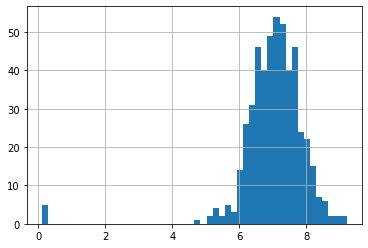

In [79]:
#Lets apply the auto encoder on dev set and find the threshold
y_dev_scores = clf.decision_function(X_dev_std)  
y_dev_scores = pd.Series(y_dev_scores)
y_dev_scores.hist(bins=50)

Lets select score < 2 as threshold for anomalies.

In [91]:
y_dev_pred = np.array([0 if s >=2 else 1 for s in y_dev_scores])
#Lets compute the CM and F1 score
cm = confusion_matrix(y_dev, y_dev_pred)
print(cm)
print(f"Dev F1 Score = {f1_score(y_dev,y_dev_pred, pos_label=0):0.3}")

[[495   0]
 [  0   5]]
Test F1 Score = 1.0


In Dev set we have F1 score of 1.0. **AutoEncoder** is able to identify outliers perfectly.
Lets test it on test set.

In [92]:
#Lets apply the auto encoder on test set
y_test_scores = clf.decision_function(X_test_std)  
y_test_pred = np.array([0 if s >=2 else 1 for s in y_test_scores])
#Lets compute the CM and F1 score
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"Test F1 Score = {f1_score(y_test,y_test_pred, pos_label=0):0.3}")

[[495   0]
 [  0   5]]
Test F1 Score = 1.0


In test set also we have F1=1.0. **AutoEncoder** is performing really well on this test set. Having said this synthetic data is also very easy with normal points coming from normal distribution and anomalous points coming from uniform distribution.

### GANomaly